# TensorFlow Lite
<hr>

## <u>Introduction</u>

In this part, we will cover about:
- what TFLite is,
- How it works to bring a Machine Learning model to mobile and embedded system,
- How to shrink the model to fit these devices,
- the overall architecture that support TFLite,
- How to use the model to iOS, android, and embedded system.

__Make the model available on a resource constraint hardware like mobile edge__

After you created the best model that is ready to be deployed, we need to think about all the things that a mobile solution needs. TensorFlow Lite helps you create and build the model with ease for mobile / edge computing devices and offer them to the world.

### Features

__Lightweight__. Our aim is to be lightweight working on small low-power devices like phone and may not be as accurate as those which run on super computer in the cloud.

__Low-latency__. TensorFlow Lite is suitable to run on devices with low-latency, even without internet connection.

__Privacy__. TensorFlow Lite uses on devices machine learning to operate, so no need for the data to leave the device ensuring privacy. 

__Improved power consumption__. TFLite improves power consumption since network connection tends to be power hungry. 

__Efficient model format__. TFLite creates a small binary-sized model with the minor impact on accuracy.

__Pre-trained models__. TFLite has many pre-trained models for most common machine learning tasks with some example we can try to see how it runs on mobile device.

### Components

TensorFlow Lite consists of two main components: __Converter__ and __Interpreter__.

<table>
    <tr>
        <th style='text-align:center'>CONVERTER (to TensorFlow Lite Format)</th>
        <th style='text-align:center'>INTERPRETER (Core)</th>
    </tr>
    <tr>
        <th style='text-align:center'>Transform TensorFlow models into a form efficient for reading by the interpreter.</th>
        <th style='text-align:center'>Diverse platform support (Android, iOS, embedded Linux, microcontrollers/IoT)</th>
    </tr>
    <tr>
        <th style='text-align:center'>Introduces optimizations to improve binary size model performance and/or reduce model size.</th>
        <th style='text-align:center'>Platform APIs for accelerated inference.</th>
    </tr>
    
</table>

To put it all together, here are the steps to utilize the TensorFlow Lite for our benefit:

__1. Jump Start__. Use the Pretrained or Retrained Models

__2. Custom Model__. Develop and deploy a custom model.

__3. Performance__. Explore options, validate and accelerate models.

__4. Optimize__. Model Optimization Toolkit.

### Performance

Running inference on computer having machine learning on mobile devices is __resource demanding__, due to devices limited processing and power. So inference in these devices need to be performed quickly in order to avoid overheat and make mostly real-time application possible. 

<img src='Visualization/performance.jpg' alt='taken from tfcertification.com' width="500">

For this purpose, TensorFlow Lite can use hardware acceleration libraries / APIs for supported devices. One way to improve inference on Android devices, you can use Android Neural Network API for optimization.

Then, you can also leverage hardware like edge TPU to boost the inference. Edge TPUs are solely build for operating on deep learning models. Not only for serving them, but training them as well. Hence, they are known for high performing and have a low-power footprint while being small in size.

### Delegates

TensorFlow Lite Delegates is another form of acceleration from TensorFlow Lite. It is a way to pass your graph execution to hardware that is specialized to run inference. For this, TensorFlow Lite provides code for an experimental GPU delegate that can be used to accelerate the models on devices that have an available GPU. __GPUs are built to run many mathematical operation in parallel which makes them perfect for machine learning inference.__

<img src='visualization/delegates.jpg' alt='taken from tfcertification.com' width="600">

We recommend you to check the following link to see the sample apps that use the TensorFlow Lite Delegates:
https://www.tensorflow.org/lite/performance/gpu

### Optimization Techniques

Due to the generally limited resources on mobile and mobile devices, so it's very critical that deployed machine learning models have optimum model size, low latency and power consumption. Thus, there are several methods to achieve this optimum optimization:

1. __Quantization.__ It reduces the precition of the numbers in the weights of the models.
2. __Weight Pruning.__ It reduces the overall number parameters.
3. __Model Topology Transforms.__ It converts the overall model topology to get more efficient model. 

For now, we recommend you to focus only on Quantization because that can give you the biggest and easiest gains.

### Why Quantize?

__Quantization__ is the process of constraining the input from a continuous or otherwise a large set of values (such as the real numbers) to a discrete set (such as integers). Quantization optimizes your model with reduces precition representation of weights and optionally activation for both storage and computation. The followings are several benefits we can gain from Quantization:
1. All available CPU platforms are supported.
2. Reducing latency and inference cost.
3. Low memory footprint.
4. Allow execution on hardware restricted-to or optimized-for fixed-point operations.
5. Optimized models for special purpose HW accelerators (TPUs).

### Putting it all together

__1. JUMP START__. Use pretrained or Retrained Models.

__2. CUSTOM MODEL__. Develop and deploy a custom model.

__3. PERFORMANCE__. Explore options, validate and accelerate models.

__4. Optimize__. Model Optimization Toolkit.

## <u>How To [Part 1]</u>

### TensorFlow Lite Converter

In summary, the process will look something like this:

<img src='visualization/tflite_summary.jpg' alt='taken from tfcertification.com' width="600">

- We will train the model using TensorFlow then save it as the saved model.
- Next, we will use TFLite converter to convert the saved model into a TFLite model.

<img src='Visualization/tflite converter.jpg' alt='taken from tfcertification.com' width="600">

When you create a model with TensorFlow, you can save the model either using:
- `tf.Keras` Model
- `SavedModel`
- Concrete Function(s)

Then, the converter will take the model and convert it to __`.tflite`__ format, which a flat buffer that can be used on a mobile device, along with optional backend like NN API or GPUs. 

<img src='visualization/parameters for conversion.jpg' alt='taken from tfcertification.com' width='800'>

In Phyton, when we develop a work station, we can call __`tf.lite.TFLiteConverter`__ to the conversion. Depending on how your model is represented, you can then instantiate it from SavedModel / Keras Model / Concrete Function(s) in order to get the output.

__Preferred Model: `SavedModel`__
- The standard for serializing a TensorFlow model
- A MetaGraph to hold metadata
- Holds snapshot of the trained model (with model weights and computation)
- No model building code required
- Support model versioning

### Convert TensorFlow Model

__Load the `.h5` model that you have trained__

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# load the best saved model from our last training
myModel = load_model('Models/model_4.h5')

__Instantiate the TFLite converter from that saved model__. 

Once you have done, simply call the convert method and you will get the flattened version that you can use with TensorFlow Lite.

In [ ]:
# create a TFLiteConverter object from a TensorFlow Keras model 
converter = tf.lite.TFLiteConverter.from_keras_model(myModel)

# converts a Keras model based on instance variable
myModel_tflite = converter.convert()

__Save out the `.tflite` file by writing it to the file system__. 

We can write the byte of the converter TFLite model to the file system. Now you have a model that can be deployed to Android, iOS, or edge system.

In [ ]:
from pathlib import Path

# Save the model
tflite_model_file = Path('clothing_classifier.tflite')
tflite_model_file.write_bytes(myModel_tflite)

# with tf.io.gfile.GFile('clothing_classifier.tflite', mode='wb') as file:
#     file.write(myModel_tflite)

### Post-training Quantization

One simple method to do the quantization is called post-training quantization. In this case, instead of quantizing your model during training, and effectively changing your training code, you instead quantize as part of the process of converting the model to the TensorFlow Lite format. To put it simply, we convert all the floats in the weight of the models to integer.

The followings are the benefits of using this technique:
- Reduced precision representation with 3x lower latency
- Little degradation in model accuracy
- Optimization modes: `default` (both size and latency), `size` (being reduced) , `latency` (being reduced).
- Efficiently represents an arbitrary magnitude of ranges
- Quantization target speficication (FP32/INT8)

The following is the example of how we overwrite the default behavior of the converter to optimize primarily for size, latency, or leave it at the default where the converter will try to figure out the best balance for size and latency. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

myModel = load_model('Models/model_4.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(myModel)

# Optimize for size
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Optimize for latency
# converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]

# Optimize for the best balance between size and latency
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_quant_model = converter.convert()

### Post-Training Integer Quantization

<img src='visualization/integer-quantization.jpg' alt='taken from tfcertification.com' width="600">

At some cases, like Edge TPUs, the accelerator uses only integer. For this, the optimization toolkit allows you to do the post-training integer quantization that makes the model 4 times smaller. You can further optimize by using __calibration data__ when you run inference on the small set of input so as to determine the right scaling parameters to use when converting a model for integer quantization.

The following is how to convert a saved model to TensorFlow Lite with post-training integer quantization.
- Define the generator which is designed to generate samples from the datasets
- Set the default optimization mode where balance the size and latency
- Pass our generator to TensorFlow Lite Converter as a representative dataset. The representative dataset is used for evaluating optimization. This is done by running multiple inferences on floating point TensorFlow Lite Model using the used representative dataset as input. 
- We use the values from inferences to determine the scaling parameters needed to execute all tensors of the model in integer arithmetic. This makes the model allow the activations to be quantized along with the weight.
- The resulting model will have as many quantized operations as possible. For operations that don't have a quantized implementation, they will fall back to the float one, hence allowing the model to still take float inputs and outputs for convenience.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Define the generator
def generator():
    data = tfds.load(...)
    for _ in range(num_calibration_steps):
        image, = data.take(1)
        yield [image]

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

# Set the optimization mode
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Pass the representative dataset to the converter
converter.representative_dataset = tf.lite.RepresentativeDataset(generator)

If you have operations that don't quantize implementation, their floating point values will be used automatically. This makes for convergent to occur smoothly, while restricting deployment to special purpose accelerators that only support integers. Hence, to support these devices that don't support floating point operation, we just tell the converter to only output integers, and this can be done by constraining the quantization target specifications to `TFLITE_BUILTINS_INT8`.

Learn more about supported ops: https://www.tensorflow.org/lite/guide/ops_compatibility

In [ ]:
...
# Set the optimization mode
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]

# Pass the representative dataset to the converter
converter.representative_dataset = tf.lite.RepresentativeDataset(generator)

# Restricting supported target op specification to INT8
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

To overcome the unsupported ops, we can use __`TF-SELECT`__:

http://www.tensorflow.org/lite/guide/ops_select

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

converter.target_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, 
                        tf.lite.OpsSet.SELECT_TF_OPS]

tflite_model = converter.convert()

### Optimizing the Models in Summary

Below is the flow chart that we're likely to follow when optimizing the TensorFlow Lite models. 
<img src='visualization/optimization summary.jpg' alt='taken from tfcertification.com' width="800">

If you don't intend to quantize the model, you will end up with the floating point model. However, if you only want to quantize the weight in the model, you can do so by just setting the one of the post-training optimization models in the converter. The converter will do its best to quantize all the operation but your model may still end up with few floating point operations. 

### TensorFlow Lite Interpreter in Python

One really nice feature is to test your model using Python. You don't need to deploy it on mobile or embedded system before you can start using it. 

In short, the followings are the steps we can go:
- Load the TensorFlow Lite Model and allocate the tensors
- Extract the input and output tensors for the model
- Set the input tensor with some validation data and invoke the interpreter to run inference on it before reading the result by looking at the output tensor.

In [ ]:
import tensorflow.lite as tflite

# Load the TFLite model and allocate the tensors
interpreter = tflite.Interpreter(model_content = tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Point the data to be used for testing and run the interpreter
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

## <u>How to [Part 2]</u>

### Getting a Basic Model Running

<img src='visualization/getstarted.jpg' alt='taken from tfcertification.com' width="800">

### Transfer Learning 

<img src='visualization/transferlearning.jpg' alt='taken from tfcertification.com' width="600">
A common scenario when using mobile application is to take the existing models that have been on large datasets with many trained layers that are specialized to your task. Then, you can take advantage of this by retraining a few last layers using features that were learned in the original model and still get a great result even with small dataset. 

### Transfer Learning with TensorFlow Hub

Say we want to classify cats and dogs, here is the steps we can follow:

<img src='visualization/tfhub.jpg' alt='taken from tfcertification.com' width="700">

# Model Deployment

__Notes__:
- Typically, we will not put this procedure in production.
- TensorFlow based on Python is too large and not optimized for serving/prediction. However, it's optimized for training. Hence, we need to use something else for production.
- Instead, we can use TensorFlow Serving, TensorFlow Lite, AWS Lambda, etc.

__AWS Lambda__:

By using AWS Lambda, we can run code without thinking about the servers. Hence, we don't need to rent an instance, instead just define a function and specify what is the input and output. We only need to pay for the time this function is actually run. For example, if our function only needs 2 seconds to run, then we only need to pay for 2 seconds. 

Now, we want to use this model and deploy it using Lambda. Here are the steps you can follow:

## Convert the Model

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

In [2]:
# load the best saved model from our last training
myModel = load_model('Models/model_4.h5')

# create a TFLiteConverter object from a TensorFlow Keras model 
converter = tf.lite.TFLiteConverter.from_keras_model(myModel)

# converts a Keras model based on instance variable
myModel_tflite = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\DIARDA~1\AppData\Local\Temp\tmpuz_ckke6\assets


In [3]:
from pathlib import Path

# Save the model
tflite_model_file = Path('clothing_classifier.tflite')
tflite_model_file.write_bytes(myModel_tflite)

190051464

## Use the Model

### TFLite Interpreter

In [4]:
import tensorflow.lite as tflite
# in AWS Lambda, we need to use this import below
# import tflite_runtime.interpreter as tflite

In [5]:
# Create an interpreter interface for any model in TFLite
interpreter = tflite.Interpreter(model_path='clothing_classifier.tflite')
interpreter.allocate_tensors()

In [6]:
# Get a list of input details from the model
input_details = interpreter.get_input_details()
input_index = input_details[0]['index']
input_details

[{'name': 'input_1',
  'index': 0,
  'shape': array([  1, 150, 150,   3]),
  'shape_signature': array([ -1, 150, 150,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [7]:
# Get a list of output details from the model
output_details = interpreter.get_output_details()
output_index = output_details[0]['index']
output_details

[{'name': 'Identity',
  'index': 237,
  'shape': array([ 1, 10]),
  'shape_signature': array([-1, 10]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

### Load a Test Image as Model Input

In [8]:
labels = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'short',
    'skirt',
    't-shirt'
]

In [9]:
labels_dict = {
    0: 'dress',
    1: 'hat',
    2: 'longsleeve',
    3: 'outwear',
    4: 'pants',
    5: 'shirt',
    6: 'shoes',
    7: 'short',
    8: 'skirt',
    9: 't-shirt'
}

float32


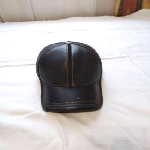

In [10]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

# Obtain the image location
img_loc = 'datasets/test/hat/2a12baab-f020-42e3-8e6b-5d82e3ed0b55.jpg'

# load the image using load_img module
img = load_img(path=img_loc, target_size=(150,150))

# Turn the image into a 4D-array
X = np.expand_dims(img, axis=0)

# Normalize the image
X = X/255.0

# Turn the image into a Numpy array with float32 data type
X = X.astype('float32')
print(X.dtype)

# Check the image
img

### Make the Prediction

In [11]:
# set the value of the input tensor
interpreter.set_tensor(input_index, X)
interpreter.invoke()

# Get the value of the output tensor
preds = interpreter.get_tensor(output_index)

In [12]:
dict(zip(labels, preds[0]))

{'dress': 4.2887897e-31,
 'hat': 1.0,
 'longsleeve': 1.780517e-16,
 'outwear': 1.9622327e-24,
 'pants': 2.201639e-33,
 'shirt': 4.8804883e-26,
 'shoes': 4.4479933e-18,
 'short': 3.290352e-37,
 'skirt': 9.4776506e-36,
 't-shirt': 1.0133569e-28}

In [13]:
labels_dict.get(np.argmax(preds[0]))

'hat'

## Lambda Function

In [14]:
import tensorflow.lite as tflite
# in AWS Lambda, we need to use this import below
# import tflite_runtime.interpreter as tflite

# Create an interpreter interface for any model in TFLite
interpreter = tflite.Interpreter(model_path='clothing_classifier.tflite')
interpreter.allocate_tensors()

# Get a list of input details from the model
input_details = interpreter.get_input_details()
input_index = input_details[0]['index']

# Get a list of output details from the model
output_details = interpreter.get_output_details()
output_index = output_details[0]['index']

### Func: `predict`

In [15]:
def predict(X):
    # set the value of the input tensor
    interpreter.set_tensor(input_index, X)
    interpreter.invoke()

    # Get the value of the output tensor
    preds = interpreter.get_tensor(output_index)
    
    return preds[0]

### Func: `decode_predictions`

In [16]:
labels = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'short',
    'skirt',
    't-shirt'
]

def decode_predictions(pred):
    result = {label: float(score) for label, score in zip(labels, pred)}
    return result

### Func: `preprocessor`

In [17]:
def preprocessor(img_url):
    # load the image using PIL module
    img = Image.open(urlopen(img_url))
    
    # Specify the image target size
    img = img.resize((150, 150))
    
    # Turn the image into a 4D-array
    X = np.expand_dims(img, axis =0)
    
    # Normalize the image
    X = X/255.0
    
    # Turn the image into a Numpy array with float32 data type
    X = X.astype('float32')
    
    return X

### Func: `lambda_handler`

In [18]:
from urllib.request import urlopen
from PIL import Image

def lambda_handler(event, context):
    # Obtain the image location
    url = event['url']
    
    # Preprocess the image
    X = preprocessor(url)
    
    # Make prediction
    preds = predict(X)
    
    # Obtain the result
    results = decode_predictions(preds)
    return results

### Put Everything Together

In [19]:
# Simulate the event (trigger)
event = {'url': 'https://raw.githubusercontent.com/diardanoraihan/E2E_Deep_Learning/main/Clothes_Classification/Datasets/test/pants/01033304-f9a4-48c4-af65-677512880fae.jpg'} 

In [20]:
# Call the lambda_handler
results = lambda_handler(event, context=False)

In [21]:
# See the prediction result
results

{'dress': 2.1086591459607007e-06,
 'hat': 2.0010727829530145e-13,
 'longsleeve': 0.0012293169274926186,
 'outwear': 0.000773618754465133,
 'pants': 0.3927960991859436,
 'shirt': 0.00033335198531858623,
 'shoes': 5.916072609579714e-07,
 'short': 0.6048617362976074,
 'skirt': 3.102071332250489e-06,
 't-shirt': 1.20492529731564e-07}

## Deploy Locally with Docker

We will compile everything as a separate file called `lambda_fucntion.py`. Then, we want to take and deploy it using AWS Lambda. For that, we will use Docker. AWS Lambda supports docker, so we can use a container image to deploy our function.

In this section, you will learn how to run the model locally using Docker within your machine. 

### `lambda_function.py`

First, let's create a file that stores all the functions needed to run the app, starting from defining the interpreter, receiving the input image, preprocessing the image, and use the saved model to make the prediction.

In [ ]:
# in AWS Lambda, we need to use this import below
import tflite_runtime.interpreter as tflite
import numpy as np
from urllib.request import urlopen
from PIL import Image

# Create an interpreter interface for any model in TFLite
interpreter = tflite.Interpreter(model_path='clothing_classifier.tflite')
interpreter.allocate_tensors()

# Get a list of input details from the model
input_details = interpreter.get_input_details()
input_index = input_details[0]['index']

# Get a list of output details from the model
output_details = interpreter.get_output_details()
output_index = output_details[0]['index']

def predict(X):
    # set the value of the input tensor
    interpreter.set_tensor(input_index, X)
    interpreter.invoke()

    # Get the value of the output tensor
    preds = interpreter.get_tensor(output_index)
    
    return preds[0]

labels = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'short',
    'skirt',
    't-shirt'
]

def decode_predictions(pred):
    result = {label: float(score) for label, score in zip(labels, pred)}
    return result

def preprocessor(img_url):
    # load the image using PIL module
    img = Image.open(urlopen(img_url))
    
    # Specify the image target size
    img = img.resize((150, 150))
    
    # Turn the image into a 4D-array
    X = np.expand_dims(img, axis =0)
    
    # Normalize the image
    X = X/255.0
    
    # Turn the image into a Numpy array with float32 data type
    X = X.astype('float32')
    
    return X

def lambda_handler(event, context):
    # Obtain the image location
    url = event['url']
    
    # Preprocess the image
    X = preprocessor(url)
    
    # Make prediction
    preds = predict(X)
    
    # Obtain the result
    results = decode_predictions(preds)
    return results

### `Dockerfile`

The next step is to create a Dockerfile. __What should we put in the docker file?__

- __Dockerfile__ is a way for you to put all the dependencies you need for running the code into one single image that contains everything. 


- __A Docker image__ is a private file system just for your container. It provides all the files and code your container needs.


- This image is self-sufficient because it has everything you need, such as:
    - installing the python package management system.
    - installing the pillow library to deal with image file.
    - installing the TensorFlow Lite tflite_runtime interpreter.
    - taking our model in tflite file and copy it to the docker image.
    - taking the lambda_function.py and copy it to the docker image.
    
The file below is the official docker image from Amazon.

<hr>

```python
FROM public.ecr.aws/lambda/python:3.7

RUN pip3 install --upgrade pip

RUN pip3 install pillow --no-cache-dir
RUN pip3 install https://raw.githubusercontent.com/alexeygrigorev/serverless-deep-learning/master/tflite/tflite_runtime-2.2.0-cp37-cp37m-linux_x86_64.whl --no-cache-dir

COPY clothing_classifier.tflite clothing_classifier.tflite
COPY lambda_function.py lambda_function.py

CMD [ "lambda_function.lambda_handler" ]
```
<hr>

What we need to do now is to run and build this docker image, and deploy it using AWS. Another option to deploy the model is by running it locally.

### Build the Docker Image

The followings are the steps we do to run the application locally:

__Run the docker daemon__. There are 2 ways to do this: 
- First option is to open __cmd__ as __administrator__, then launch the following command: `"C:\Program Files\Docker\Docker\DockerCli.exe" -SwitchDaemon`
    
- Second option is to run the __Docker Desktop__ from the start menu and validate that the docker is in __running__ state. 
    

__Build an image from a Dockerfile__. _A Docker image_ is a private file system just for your container. It provides all the files and code your container needs.One important note is that do not change the working directory in Dockerfile

```
$ docker build -t tf-lite-lambda .
```

- The command above will build the image from the content of the folder you are currently in, with the tag name `tf-lite-lambda`. 

### Run the Container Image

__Start a container based on the image you built in the previous step__. Running a container launches your application with private resources, securely isolated from the rest of your machine.

```
$ docker run --rm -p 8080:8080 --name clothes-classifier tf-lite-lambda
```

- The `-p` (stands for _publish_) indicates that we want to map the container port 80 to the host machine port 80. The container opens a Web server on port 80, and we can map ports on our computer to ports exposed by the container.

- The `--rm` (stands for _remove_) indicates that we want to automatically remove the cotainer when it exists.

- The `--name` gives a name to a new container, and `tf-lite-lambda` is the image name we use to create the container.

__Save and share your image on Docker Hub__ to enable other users to easily download and run the image on any destination machine.

```
$ docker tag tf-lite-lambda [userName]/tf-lite-lambda
$ docker push [userName]/tf-lite-lambda
```

Here are the screenshots of the results from the previous commands:

<img src='visualization/build n run the docker app.jpg' alt='taken from tfcertification.com'>

### `test.py`

After we run the model, we want to test it. We need to create a special file that we can call to see the results of what the model has predicted. 

The file contains:
- the complete categories from the expected input image.
- a PANTS (test) image obtained from this link: http://bit.ly/mlbookcamp-pants. We will send a request that has a key `url` and a url of the image
- a URL address indicating that we deploy on the localhost inside the docker.
- a procedure to send a post request to the target URL address to obtain the prediction result.
- parsing the prediction result and showing it to the user.

In [ ]:
import requests
import numpy as np

labels = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'short',
    'skirt',
    't-shirt'
]

data = {
    "url": "http://bit.ly/mlbookcamp-pants"
}

url ="http://localhost:8080/2015-03-31/functions/function/invocations"

results = requests.post(url, json=data).json()

print('[PREDICTION RESULT]')
print('+-------------------------------------------+')
score = []
for cat in results:
	print('+ {}: {}'.format(cat, results[cat]))
	score.append(results[cat])

best_cat = np.argmax(score)
print('+-------------------------------------------+')
print('Therefore, the model predicts the input image as {}'.format(labels[best_cat].upper()))
print()

Run the `test.py` in your CLI and see the result for yourself:


<img src='visualization/app prediction result.jpg' alt='taken from tfcertification.com'>

## Deploy on AWS

We just deployed the model locally with Docker. Now, we can bring the same container and deploy it on AWS. AWS has everything you need to deploy your deep learning model online. For this case, we will use AWS CLI, AWS ECR, AWS Lambda, and AWS API Gateaway.

### Install AWS CLI

Everything you do with AWS is an API call. Although you can do by visiting the website, but wouldn't it be nice if you can do it one time? Hence, make sure you have installed AWS CLI in your local machine. https://docs.aws.amazon.com/cli/latest/userguide/install-cliv2-windows.html

### Configure Your AWS Account

If we want to deploy the app on AWS, it's obvious we need to set up an account there. After you make an AWS IAM User account, set up your Access Key ID, Secret Access Key, Default Region, and Default Output Format (commonly JSON). Once we have done this, we can make programmatic calls to AWS from the AWS CLI.

```
$ aws configure
```

<img src='visualization/aws configure.jpg' alt='taken from tfcertification.com'>

### Create a Repo in AWS ECR (Elastic Container Registry)

AWS ECR is a place for us to put Docker images. By running the following command, we will create a private repository to store the Docker image we have built previously.

```
$ aws ecr create-repository --repository-name lambda-images
```

<img src='visualization/aws create repo.jpg' alt='taken from tfcertification.com'>

### Publish the Image to the Repo

Now, we want to publish the image that we have built locally. The followings are the steps cited directly from AWS (`AWS ECR > Repositories > lambda-images > View Push Command`):

- Retrieve an authentication token and authenticate your Docker client to your registry.

```
$ aws ecr get-login-password --region us-east-1 | docker login --username AWS --password-stdin XXXXXXXXX474.dkr.ecr.us-east-1.amazonaws.com
```

- Build your Docker image using the following command. 

```
$ docker build -t lambda-images .
```

- Tag your image so you can push the image to this repository.

```
$ docker tag tf-lite-lambda XXXXXXXXX474.dkr.ecr.us-east-1.amazonaws.com/lambda-images:tf-lite-lambda
```

- Run the following command to push this image to your newly created AWS repository.

```
$ docker push XXXXXXXXX474.dkr.ecr.us-east-1.amazonaws.com/lambda-images:tf-lite-lambda
```

Check the pushed image on the AWS ECR web page. Make sure to copy the URL because we need it to create a Lambda Function.

<img src='visualization/aws push image.jpg' alt='taken from tfcertification.com' width="600">

### Create Lambda Function

Now, we are ready to create a Lambda Function. Go to AWS `Lambda` and click `Create function`. Choose `Container Image`.

<img src='visualization/aws create lambda func.jpg' alt='taken from tfcertification.com' width="800">

Give your function a unique name and fill in the Container Image URL with the Image URL that you copied earlier. By leaving everything to default, click `Create function`

### Test the Lambda Function

You just created a lambda function for a prediction task. However, the current configuration does not give us sufficient memory and timeout. We have a big model and the function will take some time to run and load everything to the memory for the first time. Thus, we need to reconfigure it. Go to `Configuration` > `General Configuration` > click `Edit` and set RAM and Timeout to __512/1024__ and __30__ sec respectively. Save it.

<img src='visualization/aws RAM Timeout.jpg' alt='taken from tfcertification.com' width="600">


Next, create a test with this JSON file format:
```python
{
    "url": "https://tinyurl.com/clothes-t-shirt"
}
```
<img src='visualization/aws test event.jpg' alt='taken from tfcertification.com' width="800">

Give a new event a name and click `Test` after you save it. Then, you will see the following result:

<img src='visualization/aws test result.jpg' alt='taken from tfcertification.com' width="800">

One thing you need to be aware of is that with AWS Lambda, you will be charged based on the number of requests and the duration, that is, the time it takes for our code to be executed. Please refer to this [link](https://aws.amazon.com/lambda/pricing/) for more pricing info.

### API Gateaway Integration

You just tested the function and it seems to work well in making the prediction. What's left is to use it from outside (online). To do this, we need to create an API via AWS API Gateaway.

__1. Create a New API__

- Visit AWS API Gateaway, then choose REST API by clicking `Build` button.
- Choose the protocol: `REST`. Choose New API for __Creating New API__. Then, fill in the API Name and add some description.

<img src='visualization/aws rest api.jpg' alt='taken from tfcertification.com' width="300"><img src='visualization/aws api setting.jpg' alt='taken from tfcertification.com' width="600">

__2. Create a resource: Predict and a method POST__
- From `Actions`, choose Make Resource > fill in "predict".
- From `Actions`, choose Make Method > select `POST`
<img src='visualization/aws method resource.jpg' alt='taken from tfcertification.com' width="200">

__3. Select the Lambda Function and add some details__. 
- Click on `POST`, then make sure to write the correct name for the __Lambda Function__ and leave everything by default. 
<img src='visualization/aws predict post setup.jpg' width="500">

__4. Test the API__. 
- From the flow chart execution, click `Test`.
<img src='visualization/aws test api.jpg' width="800">
- To test it, input the following code in the __Request Body__:
<img src='visualization/aws request body.jpg' width="400">
- You should see the following result in the __Response Body__:
<img src='visualization/aws response body.jpg' width="400">

__5. Deploy the API__
- Finally, we need to deploy the API to use it outside. From `Actions`, click `DEPLOY API`. 
<img src='visualization/aws deploy api.jpg' width="400">
- Obtain the URL from the "Invoke URL" section. In this case, we have: https://xw2bv0y8mb.execute-api.us-east-1.amazonaws.com/test
- Open the Postman App or go to [reqbin](https://reqbin.com/) to test the REST API we just created. Notice, since we specify `predict` as our method for `POST`, we need to add `/predict` at the end of the URL. Hence, the complete URL to make an API call for making a prediction is `https://xw2bv0y8mb.execute-api.us-east-1.amazonaws.com/test/predict`. Copy and paste the link to the URL section in the app.
- Copy the following object in JSON as the body to make this POST request. Click `Send`.
```javascript
{
    "url": "https://tinyurl.com/clothes-t-shirt"
}
```
- You can see the prediction result as the content received after making the API call POST request. Congrats, now your deep learning model is totally online and ready to help the world become a better place!

<img src='visualization/aws post request.jpg'>